In [6]:
import pandas as pd
import os

In [10]:
df= pd.read_csv('./Sales_Data/Sales_April_2019.csv')

files= [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()
  
for file in files:
    df= pd.read_csv('./Sales_Data/'+ file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index= False)

In [7]:
all_data= pd.read_csv('all_data.csv')
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

### clean the data

### drop rows of NaN 

In [10]:
nan_df= all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data= all_data.dropna(how='all')
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

### find OR and delete it

In [11]:
all_data= all_data[all_data['Order Date'].str[0:2]!='Or']



### convert columns to correct type

In [12]:
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']= pd.to_numeric(all_data['Price Each'])
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

### AUGMENT DATA WITH ADDITIONAL COLUMNS

### TASK2: ADD MONTH COLUMN

In [13]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']= all_data['Month'].astype('int32')  
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4

### task 4  ADD CITY COLUMN

### .apply method

In [14]:
def get_city (address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x:get_city(x) + ' (' + get_state(x) + ')')
 


In [61]:
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99   

                City  
0        Dallas (TX)  
2        Boston (MA)  
3   Los Angeles (CA)  
4   Los Angeles (CA)  
5   Los Angeles (CA)

#### Q1. WHAT WAS THE BEST MONTH FOR SALES? hOW MUCH WAS EARNED THAT MONTH?

### TASK 3 ADD A SALES COLUMN

In [15]:
all_data['Sales']= all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   

                City   Sales  
0        Dallas (TX)   23.90  
2        Boston (MA)   99.99  
3   Los Angeles (CA)  600.00  
4   Los Angeles (CA)   11.99  
5   Los Angeles (CA)   11.99

In [ ]:
#### Q1. WHAT WAS THE BEST MONTH FOR SALES? hOW MUCH WAS EARNED THAT MONTH?

In [16]:
results= all_data.groupby('Month').sum()
results

Quantity Ordered  Price Each       Sales
Month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34

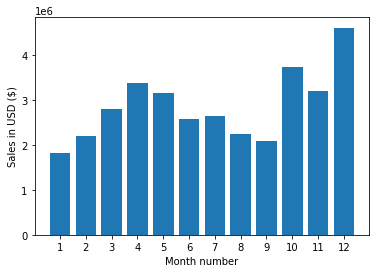

In [17]:
import matplotlib.pyplot as plt
months= range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### Q2. WHAT CITY HAS THE HIGHEST NO OF SALES

### CITY COLUMN AUGMENT

In [18]:
results= all_data.groupby('City').sum()
results

Quantity Ordered  Price Each   Month       Sales
City                                                                 
 Atlanta (GA)                   16602  2779908.20  104794  2795498.58
 Austin (TX)                    11153  1809873.61   69829  1819581.75
 Boston (MA)                    22528  3637409.77  141112  3661642.01
 Dallas (TX)                    16730  2752627.82  104620  2767975.40
 Los Angeles (CA)               33289  5421435.23  208325  5452570.80
 New York City (NY)             27932  4635370.83  175741  4664317.43
 Portland (ME)                   2750   447189.25   17144   449758.27
 Portland (OR)                  11303  1860558.22   70621  1870732.34
 San Francisco (CA)             50239  8211461.74  315520  8262203.91
 Seattle (WA)                   16553  2733296.01  104941  2747755.48

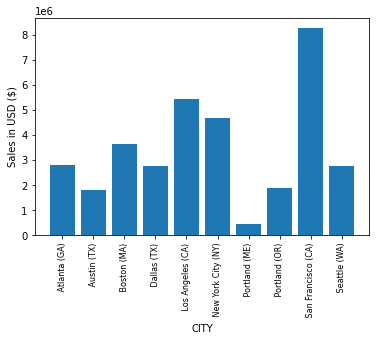

In [19]:
cities = [city for city , df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('CITY')
plt.show()

### question 3. what time should we display advertisements to maximise likelihood of customers buying product?

In [20]:
 all_data['Order Date']= pd.to_datetime(all_data['Order Date'])

In [28]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Count']= 1
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   

                City   Sales  Hour  Minute  Count  
0        Dallas (TX)   23.90     8      46      1  
2        Boston (MA)   99.99    22      30      1  
3   Los Angeles (CA)  600.00    14      38      1  
4   Los Angeles (CA)   11.99    14      38      1  
5   Los Angeles (CA)   11.99     9      27      1

In [24]:
hours = [hour for hour , df in all_data.groupby('Hour')]
result=  all_data.groupby(['Hour']).count()

plt.plot([hour for hour , df in all_data.groupby('Hour')],all_data.groupby(['Hour']).count())

plt.xticks(hours) 
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

all_data.head()
# --11am and 7 pm are peaks hours

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   

                City   Sales  Hour  Minute  
0        Dallas (TX)   23.90     8      46  
2        Boston (MA)   99.99    22      30  
3   Los Angeles (CA)  600.00    14      38  
4   Los Angeles (CA)   11.99    14      38  
5   Los Angeles (CA)   11.99     9      27

In [27]:
all_data.groupby(['Hour']).count()

Order ID  Product  Quantity Ordered  Price Each  Order Date  \
Hour                                                                
0         3910     3910              3910        3910        3910   
1         2350     2350              2350        2350        2350   
2         1243     1243              1243        1243        1243   
3          831      831               831         831         831   
4          854      854               854         854         854   
5         1321     1321              1321        1321        1321   
6         2482     2482              2482        2482        2482   
7         4011     4011              4011        4011        4011   
8         6256     6256              6256        6256        6256   
9         8748     8748              8748        8748        8748   
10       10944    10944             10944       10944       10944   
11       12411    12411             12411       12411       12411   
12       12587    12587             12587       12587       12587   
13       12129    12129             12129       12129       12129   
14       10984    10984             10984       10984       10984   
15       10175    10175             10175       10175       10175   
16       10384    10384             10384       10384       10384   
17       10899    10899             10899       10899       10899   
18       12280    12280             12280       12280       12280   
19       12905    12905             12905       12905       12905   
20       12228    12228             12228       12228       12228   
21       10921    10921             10921       10921       10921   
22        8822     8822              8822        8822        8822   
23        6275     6275              6275        6275        6275   

      Purchase Address  Month   City  Sales  Minute  
Hour                                                 
0                 3910   3910   3910   3910    3910  
1                 2350   2350   2350   2350    2350  
2                 1243   1243   1243   1243    1243  
3                  831    831    831    831     831  
4                  854    854    854    854     854  
5                 1321   1321   1321   1321    1321  
6                 2482   2482   2482   2482    2482  
7                 4011   4011   4011   4011    4011  
8                 6256   6256   6256   6256    6256  
9                 8748   8748   8748   8748    8748  
10               10944  10944  10944  10944   10944  
11               12411  12411  12411  12411   12411  
12               12587  12587  12587  12587   12587  
13               12129  12129  12129  12129   12129  
14               10984  10984  10984  10984   10984  
15               10175  10175  10175  10175   10175  
16               10384  10384  10384  10384   10384  
17               10899  10899  10899  10899   10899  
18               12280  12280  12280  12280   12280  
19               12905  12905  12905  12905   12905  
20               12228  12228  12228  12228   12228  
21               10921  10921  10921  10921   10921  
22                8822   8822   8822   8822    8822  
23                6275   6275   6275   6275    6275

### Q4- WHAT PRODUCTS ARE MOST OFTEN SOLD TOGETHER?


In [32]:
df= all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df= df[['Order ID', 'Grouped']]. drop_duplicates()
df.head()

C:\Users\Hansraj\AppData\Local\Temp\ipykernel_74376\2575978408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


Order ID                                            Grouped
3     176560                      Google Phone,Wired Headphones
18    176574                  Google Phone,USB-C Charging Cable
30    176585  Bose SoundSport Headphones,Bose SoundSport Hea...
32    176586                AAA Batteries (4-pack),Google Phone
119   176672      Lightning Charging Cable,USB-C Charging Cable

In [37]:
from itertools import combinations
from collections import Counter

count= Counter()
for row in df['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [38]:
count= Counter()
for row in df['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,3)))

for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


### Q5. WHAT PRODUCT SOLD THE MOST? WHY DO THINK IT SOLD THE MOST?

In [39]:
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   

                City   Sales  Hour  Minute  Count  
0        Dallas (TX)   23.90     8      46      1  
2        Boston (MA)   99.99    22      30      1  
3   Los Angeles (CA)  600.00    14      38      1  
4   Los Angeles (CA)   11.99    14      38      1  
5   Los Angeles (CA)   11.99     9      27      1

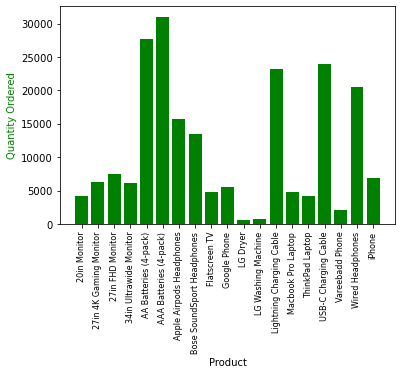

In [70]:
product_group= all_data.groupby('Product')
quantity_ordered= product_group.sum()['Quantity Ordered']

products= [product for product, df in product_group]

plt.bar(products, quantity_ordered, color= 'g')
plt.ylabel('Quantity Ordered', color ='g')
plt.xlabel('Product')
plt.xticks(products, rotation= 'vertical', size=8)
plt.show()

C:\Users\Hansraj\AppData\Local\Temp\ipykernel_74376\640107821.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation= 'vertical', size= 8)


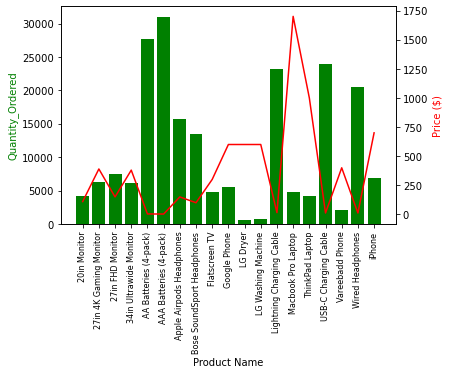

In [63]:
prices= all_data.groupby('Product').mean()['Price Each']

fig, ax1= plt.subplots()

ax2= ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity_Ordered', color= 'g')

ax2.set_ylabel('Price ($)', color= 'r')
ax1.set_xticklabels(products, rotation= 'vertical', size= 8)

plt.show()

# whenever the prices are higher the sales are lower and vice-versa
# also it depends on the demand of the product.